In this practical assignment you will learn how to work with a package that allows you to build deep neural networks. Various neural network packages are available in Python of which Google's TensorFlow is quite famous. We will use Chainer, which is another flexible neural network package. Always show how you arrived at your answer. Hand in your assignment by adding the solutions to this notebook file.

### Assignment 1 (5 points)

Go to the tutorial page for Chainer:

http://docs.chainer.org/en/stable/tutorial/basic.html

Study <i>Example: Multi-layer Perceptron on MNIST</i>. Implement a model that learns to predict the label of a handwritten character based on the pixel input. Make sure to use a model with just *one* hidden layer consisting of *50* hidden units. Run the model for 50 epochs. Use the code below to create a figure of the training and validation loss. Make sure that you define an output directory `out_dir` for which you have write access. This should also become the value for the Trainer object's `out` argument.

In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

train, test = datasets.get_mnist()
train_iter = iterators.SerialIterator(train, batch_size=100, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=100, repeat=False, shuffle=False)

class MLP(Chain):
     def __init__(self, n_units, n_out):
         super(MLP, self).__init__(
             # the size of the inputs to each layer will be inferred
             l1=L.Linear(None, n_units),  # n_in -> n_units
             l2=L.Linear(None, n_units),  # n_units -> n_units
             l3=L.Linear(None, n_out),    # n_units -> n_out
         )

     def __call__(self, x):
         h1 = F.relu(self.l1(x))
         h2 = F.relu(self.l2(h1))
         y = self.l3(h2)
         return y
     
model = L.Classifier(MLP(50, 10))  # the input size, 784, is inferred
optimizer = optimizers.SGD()
optimizer.setup(model)

updater = training.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (20, 'epoch'), out='result')

trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
trainer.extend(extensions.ProgressBar())
trainer.run()  



epoch       main/accuracy  validation/main/accuracy
     total [..................................................]  0.83%
this epoch [########..........................................] 16.67%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [..................................................]  1.67%
this epoch [################..................................] 33.33%
       200 iter, 0 epoch / 20 epochs
    273.97 iters/sec. Estimated time to finish: 0:00:43.070001.
     total [#.................................................]  2.50%
this epoch [#########################.........................] 50.00%
       300 iter, 0 epoch / 20 epochs
    271.74 iters/sec. Estimated time to finish: 0:00:43.056004.
     total [#.................................................]  3.33%
this epoch [#################################.................] 66.67%
       400 iter, 0 epoch / 20 epochs
    273.22 iters/sec. Estimated time to finish:

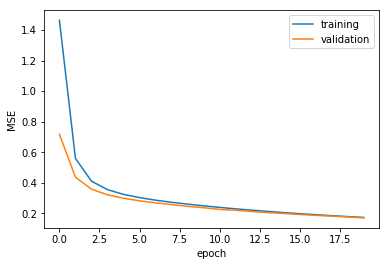

In [2]:

import json
import matplotlib.pyplot as plt
%matplotlib inline

out_dir = '/Users/Lima/Desktop/NN-17/result'

with open(out_dir + '/log') as data_file:
    data = json.load(data_file)

# extract training and testing validation loss
train_loss = map(lambda x: x['main/loss'], data)
validation_loss = map(lambda x: x['validation/main/loss'], data)

# plot training and validation error
plt.figure()
plt.plot(np.arange(len(train_loss)),np.transpose(np.vstack([train_loss,validation_loss])))
plt.legend(['training', 'validation'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

### Assignment 2 (5 points)

In this assignment your task is to repeat the above but now using a convolutional layer as the first layer. Study chainer's `convolution2D` link function, use this to replace the first layer of the previous network, and repeat the analysis. Use 5 output channels, a stride of 3 and a padding of 0 for the convolutional layer. For convenience, we change the representation of the input data to 2D such that convolution can operate on the input image. 

In [4]:

import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

train, test = datasets.get_mnist()

Xtrain = train._datasets[0].reshape([train._datasets[0].shape[0],1,28,28])
ytrain = train._datasets[1]
Xtest = test._datasets[0].reshape([test._datasets[0].shape[0],1,28,28])
ytest = test._datasets[1]

train = datasets.TupleDataset(Xtrain,ytrain)
test = datasets.TupleDataset(Xtest,ytest)

train_iter = iterators.SerialIterator(train, batch_size=100, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=100, repeat=False, shuffle=False)

class MLP(Chain):
     def __init__(self, n_units, n_out):
         super(MLP, self).__init__(
             # the size of the inputs to each layer will be inferred
             l1=L.Convolution2D(None, n_units, ksize=8, stride=3, pad=0),  # n_in -> n_units
             l2=L.Linear(None, n_units),  # n_units -> n_units
             l3=L.Linear(None, n_out),    # n_units -> n_out
         )

     def __call__(self, x):
         h1 = F.relu(self.l1(x))
         h2 = F.relu(self.l2(h1))
         y = self.l3(h2)
         return y
model = L.Classifier(MLP(50,10))  # the input size, 784, is inferred
optimizer = optimizers.SGD()
optimizer.setup(model)

updater = training.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (20, 'epoch'), out='result')

trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
trainer.extend(extensions.ProgressBar())
print('Training')
trainer.run()  



Training
epoch       main/accuracy  validation/main/accuracy
     total [..................................................]  0.83%
this epoch [########..........................................] 16.67%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [..................................................]  1.67%
this epoch [################..................................] 33.33%
       200 iter, 0 epoch / 20 epochs
    49.237 iters/sec. Estimated time to finish: 0:03:59.657988.
     total [#.................................................]  2.50%
this epoch [#########################.........................] 50.00%
       300 iter, 0 epoch / 20 epochs
    48.228 iters/sec. Estimated time to finish: 0:04:02.599490.
     total [#.................................................]  3.33%
this epoch [#################################.................] 66.67%
       400 iter, 0 epoch / 20 epochs
    49.076 iters/sec. Estimated time t

Create a scatter plot for the validation losses of models 1 and 2. What is your conclusion about the use of a convolutional layer? Explain your findings. Study the chainer documentation to get some hints for other tricks. If you continue your studies in this area, it is recommended to use low-level chainer code, to have firm control over its behavior.

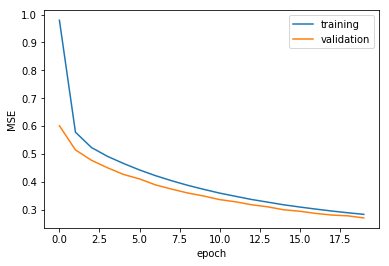

In [5]:

import json
import matplotlib.pyplot as plt
#%matplotlib inline

out_dir = '/Users/Lima/Desktop/NN-17/result'

with open(out_dir + '/log') as data_file:
    data = json.load(data_file)

# extract training and testing validation loss
train_loss = map(lambda x: x['main/loss'], data)
validation_loss = map(lambda x: x['validation/main/loss'], data)

# plot training and validation error
plt.figure()
plt.plot(np.arange(len(train_loss)),np.transpose(np.vstack([train_loss,validation_loss])))
plt.legend(['training', 'validation'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()